In [1]:
!pip install torchmetrics==0.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 12.0 MB/s 


In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time
import os

import cv2
from torchmetrics import F1Score
import pickle
from sklearn import manifold
import gzip

Plots

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='/content/drive/My Drive/6721 Dataset/6721 Project dataset/'
savepath = '/content/drive/My Drive/6721 Dataset/'
modelspath = '/content/drive/MyDrive/6721 Models/kaggle/working/'
modelspath_beforeHyper = '/content/drive/MyDrive/6721 Models/6721 Before Hyper-Parameters Model/'
modelspath_transer_learning = '/content/drive/MyDrive/6721 Models/6721 Transfer Learning Models/'
print(os.listdir(path))

['Indian Traffic Signs Prediction(85 classes)', 'Persian Traffic Sign Dataset (PTSD)', 'Traffic Signs (GTSRB plus 162 custom classes)']


**Model Plots Before Hyper-Parameter Tuning**

In [6]:
with open(modelspath_beforeHyper+'/alexnetmodel_d1_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    
with open(modelspath_beforeHyper+'/vgg11model_d1_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d2 = u.load()    

with open(modelspath_beforeHyper+'/resnetmodel_d1_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d3 = u.load() 
#print(p)

In [7]:
####### plot the the training loss here #########
def train_val_acc(steps,train_acc_d1,train_acc_d2,train_acc_d3,dataset):
    steps = [i for i in range(steps)]
    plt.figure()
    plt.xlabel('Steps')
    plt.ylabel('Train Accuracy')
    plt.title( dataset+' Train Accuracy Plot')
    plt.plot(steps,train_acc_d1)
    plt.plot(steps,train_acc_d2)
    plt.plot(steps,train_acc_d3)
    plt.legend(["AlexNet", "VGG11", "ResNet18"], loc ="lower right")
    plt.show()

In [8]:
def train_loss(train_loss_d1,train_loss_d2, train_loss_d3, steps, dataset):
    steps = [i for i in range(steps)]
    plt.figure()
    plt.xlabel('Steps')
    plt.ylabel('Train Loss')
    plt.title( dataset+' Train Loss Plot')
    plt.plot(steps,train_loss_d1)
    plt.plot(steps,train_loss_d2)
    plt.plot(steps,train_loss_d3)
    plt.legend(["AlexNet", "VGG11", "ResNet18"], loc ="lower right")
    plt.show()

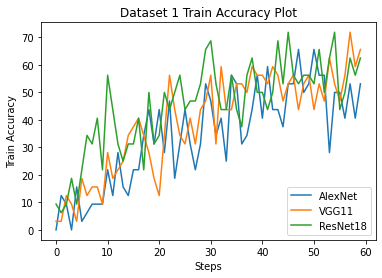

In [ ]:
train_val_acc(len(p["accuracy"]),p["accuracy"], d2["accuracy"], d3["accuracy"], "Dataset 1")

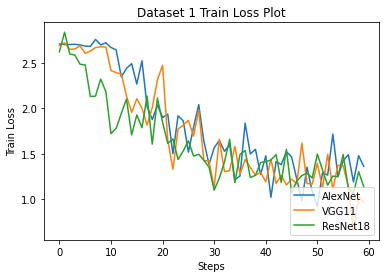

In [ ]:
train_loss(p["training_loss"], d2["training_loss"], d3["training_loss"],len(d3["training_loss"]),"Dataset 1")

In [ ]:
with open(modelspath_beforeHyper+'/alexnetmodel_d2_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    
with open(modelspath_beforeHyper+'/vgg11model_d2_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d2 = u.load()    

with open(modelspath_beforeHyper+'/resnetmodel_d2_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d3 = u.load() 
#print(p)

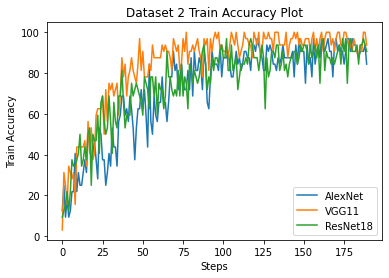

In [ ]:
train_val_acc(len(p["accuracy"]),p["accuracy"], d2["accuracy"], d3["accuracy"], "Dataset 2")

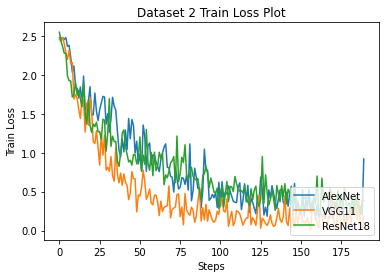

In [ ]:
train_loss(p["training_loss"], d2["training_loss"], d3["training_loss"],len(d3["training_loss"]),"Dataset 2")

In [ ]:
with open(modelspath_beforeHyper+'/alexnetmodel_d3_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    
with open(modelspath_beforeHyper+'/vgg11model_d3_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d2 = u.load()    

with open(modelspath_beforeHyper+'/resnetmodel_d3_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d3 = u.load() 
#print(p)

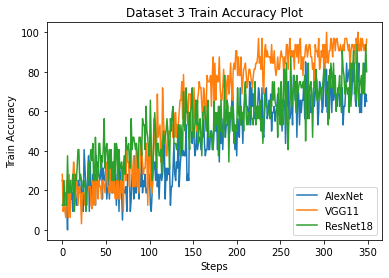

In [ ]:
train_val_acc(len(p["accuracy"]),p["accuracy"], d2["accuracy"], d3["accuracy"], "Dataset 3")

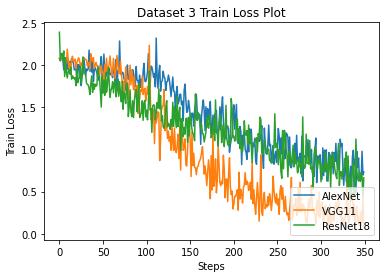

In [ ]:
train_loss(p["training_loss"], d2["training_loss"], d3["training_loss"],len(d3["training_loss"]),"Dataset 3")

**Model Plots After Hyper-Parameter Tuning**

In [ ]:
with open(modelspath+'/alexnetmodel_d1_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    
with open(modelspath+'/vgg11model_d1_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d2 = u.load()    

with open(modelspath+'/resnetmodel_d1_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d3 = u.load() 
#print(p)

In [ ]:
####### plot the the training loss here #########
def train_val_acc(steps,train_acc_d1,train_acc_d2,train_acc_d3,dataset):
    steps = [i for i in range(steps)]
    plt.figure()
    plt.xlabel('Steps')
    plt.ylabel('Train Accuracy')
    plt.title( dataset+' Train Accuracy Plot')
    plt.plot(steps,train_acc_d1)
    plt.plot(steps,train_acc_d2)
    plt.plot(steps,train_acc_d3)
    plt.legend(["AlexNet", "VGG11", "ResNet18"], loc ="lower right")
    plt.show()

In [ ]:
def train_loss(train_loss_d1,train_loss_d2, train_loss_d3, steps, dataset):
    steps = [i for i in range(steps)]
    plt.figure()
    plt.xlabel('Steps')
    plt.ylabel('Train Loss')
    plt.title( dataset+' Train Loss Plot')
    plt.plot(steps,train_loss_d1)
    plt.plot(steps,train_loss_d2)
    plt.plot(steps,train_loss_d3)
    plt.legend(["AlexNet", "VGG11", "ResNet18"], loc ="lower right")
    plt.show()

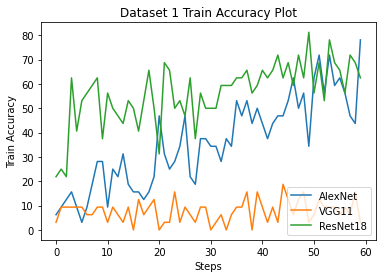

In [ ]:
train_val_acc(len(p["accuracy"]),p["accuracy"], d2["accuracy"], d3["accuracy"], "Dataset 1")

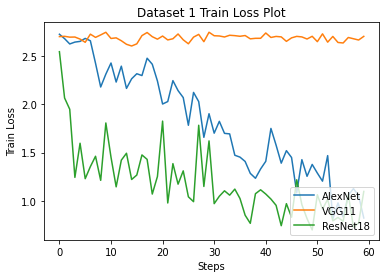

In [ ]:
train_loss(p["training_loss"], d2["training_loss"], d3["training_loss"],len(d3["training_loss"]),"Dataset 1")

In [ ]:
with open(modelspath+'/alexnetmodel_d2_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    
with open(modelspath+'/vgg11model_d2_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d2 = u.load()    

with open(modelspath+'/resnetmodel_d2_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d3 = u.load() 
#print(p)

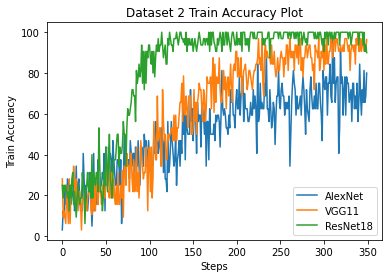

In [ ]:
train_val_acc(len(p["accuracy"]),p["accuracy"], d2["accuracy"], d3["accuracy"], "Dataset 2")

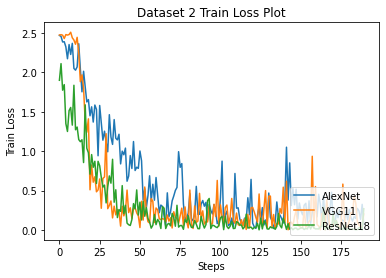

In [ ]:
train_loss(p["training_loss"], d2["training_loss"], d3["training_loss"],len(d3["training_loss"]),"Dataset 2")

In [ ]:
with open(modelspath+'/alexnetmodel_d3_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    
with open(modelspath+'/vgg11model_d3_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d2 = u.load()    

with open(modelspath+'/resnetmodel_d3_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d3 = u.load() 
#print(p)

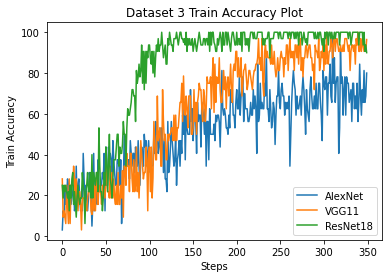

In [ ]:
train_val_acc(len(p["accuracy"]),p["accuracy"], d2["accuracy"], d3["accuracy"], "Dataset 3")

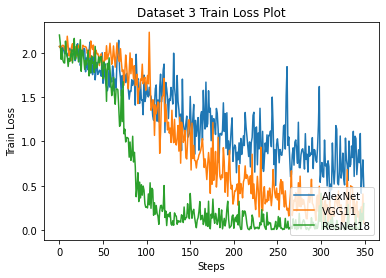

In [ ]:
train_loss(p["training_loss"], d2["training_loss"], d3["training_loss"],len(d3["training_loss"]),"Dataset 3")

**Transfer Learning Before Hyper-Parameter Tuning Model Plots**

In [18]:
with open(modelspath_transer_learning+'/alexnetmodel_tl_d1_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

with open(modelspath_transer_learning+'/resnetmodel_tl_d1_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d2 = u.load() 
#print(p)

In [15]:
####### plot the the training loss here #########
def train_val_acc(steps,train_acc_d1,train_acc_d2, dataset):
    steps = [i for i in range(steps)]
    plt.figure()
    plt.xlabel('Steps')
    plt.ylabel('Train Accuracy')
    plt.title( dataset+' Train Accuracy Plot')
    plt.plot(steps,train_acc_d1)
    plt.plot(steps,train_acc_d2)
    plt.legend(["AlexNet", "ResNet18"], loc ="lower right")
    plt.show()

In [16]:
def train_loss(train_loss_d1,train_loss_d2, steps, dataset):
    steps = [i for i in range(steps)]
    plt.figure()
    plt.xlabel('Steps')
    plt.ylabel('Train Loss')
    plt.title( dataset+' Train Loss Plot')
    plt.plot(steps,train_loss_d1)
    plt.plot(steps,train_loss_d2)
    plt.legend(["AlexNet", "ResNet18"], loc ="lower right")
    plt.show()

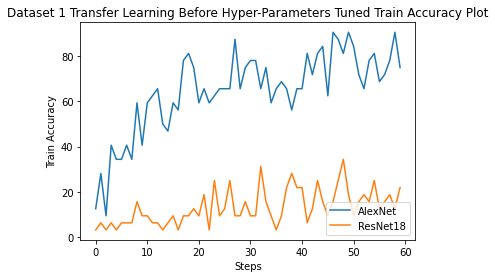

In [19]:
train_val_acc(len(p["accuracy"]),p["accuracy"], d2["accuracy"], "Dataset 1 Transfer Learning Before Hyper-Parameters Tuned")

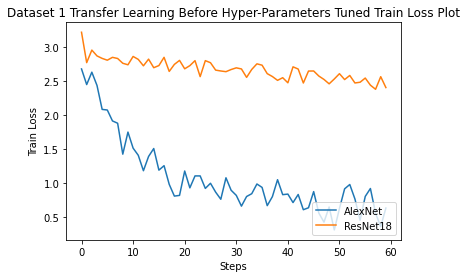

In [20]:
train_loss(p["training_loss"], d2["training_loss"],len(d2["training_loss"]),"Dataset 1 Transfer Learning Before Hyper-Parameters Tuned")

**Transfer Learning After Hyper-Parameter Tuning Models**

In [9]:
with open(modelspath+'/alexnetmodel_tl_d1_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

with open(modelspath+'/resnetmodel_tl_d1_results.pkb', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    d2 = u.load() 
#print(p)

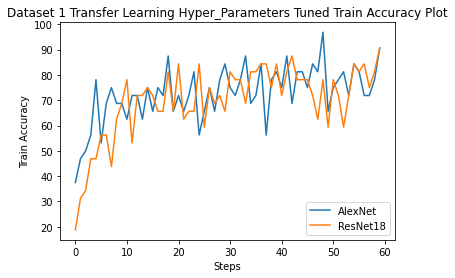

In [12]:
train_val_acc(len(p["accuracy"]),p["accuracy"], d2["accuracy"], "Dataset 1 Transfer Learning Hyper_Parameters Tuned")

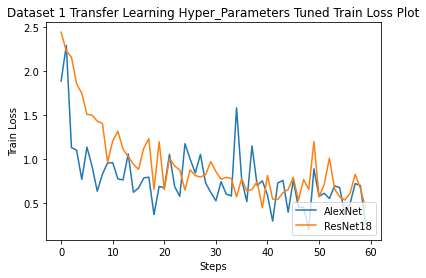

In [14]:
train_loss(p["training_loss"], d2["training_loss"],len(d2["training_loss"]),"Dataset 1 Transfer Learning Hyper_Parameters Tuned")